In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


df = pd.read_csv('ab_test_results.csv')

Clean Data

Check variable types and for nulls

In [6]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


,user_id,group,views,clicks
119995,119996,test,9.0,0.0
119996,119997,test,2.0,1.0
119997,119998,test,20.0,1.0
119998,119999,test,6.0,1.0
119999,120000,test,2.0,0.0


Check for duplicates/invalid inputs

In [5]:
duplicated = df[df.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [user_id, group, views, clicks]
Index: []


In [13]:
for column in df.loc[:,'group':'clicks']:
    print(df[column].value_counts())


control    60000
test       60000
Name: group, dtype: int64
2.0      26367
3.0      19207
1.0      19059
4.0      13288
5.0       9516
         ...  
102.0        1
114.0        1
79.0         1
92.0         1
105.0        1
Name: views, Length: 111, dtype: int64
0.0    101477
1.0     15846
2.0      2161
3.0       377
4.0        98
5.0        24
6.0        10
7.0         5
9.0         1
8.0         1
Name: clicks, dtype: int64


In [51]:
df.groupby("group")["views"].sum()

group
control    297144.0
test       301785.0
Name: views, dtype: float64

In [52]:
df.groupby("group")["clicks"].sum()

group
control    10303.0
test       11620.0
Name: clicks, dtype: float64

Visualize views

In [34]:
std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))
views = df.groupby("group")["views"]
views = views.agg([np.mean, std_p, se_p])
views.columns = ["views", "std_deviation", "std_error"]
views.style.format("{:.3f}")

,views,std_deviation,std_error
group,,,
control,4.952,5.782,0.024
test,5.030,6.045,0.025


In [35]:
clicks = df.groupby("group")["clicks"]
clicks = clicks.agg([np.mean, std_p, se_p])
clicks.columns = ["clicks", "std_deviation", "std_error"]
clicks.style.format("{:.3f}")

,clicks,std_deviation,std_error
group,,,
control,0.172,0.454,0.002
test,0.194,0.490,0.002


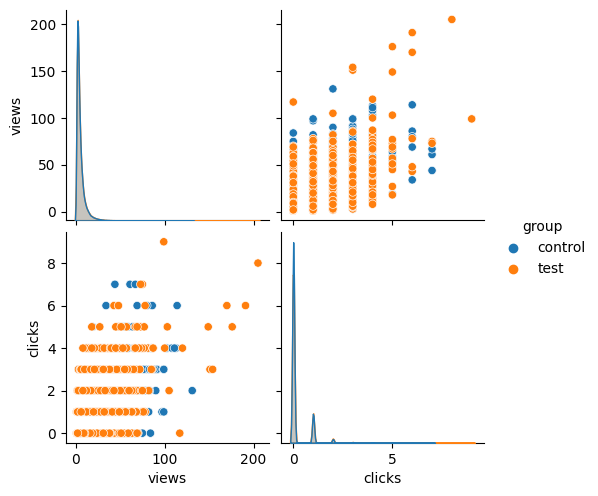

In [23]:
sns.pairplot(df.loc[:,'group':'clicks'],hue="group")
plt.show()

Perform Regression

In [44]:
dummy_group = pd.get_dummies(data= df['group'], drop_first=True) # control = 1, test = 0

In [41]:
views_regre = LinearRegression()
views_regre.fit(dummy_group,df['views'].values)
print(pd.DataFrame(views_regre.coef_,dummy_group.columns,columns=['Correlation Coefficient of Views']))

         Correlation Coefficient of Views
control                     -3.985194e+12
test                        -3.985194e+12


In [42]:
clicks_regre = LinearRegression()
clicks_regre.fit(dummy_group,df['clicks'].values)
print(pd.DataFrame(clicks_regre.coef_,dummy_group.columns,columns=['Correlation Coefficient of Clicks']))

         Correlation Coefficient of Clicks
control                       1.355742e+11
test                          1.355742e+11
